<a href="https://colab.research.google.com/github/peterH1217/apresC/blob/main/miniproject_Li_Pang(Peter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
time=5     #total time 5 sec
bins=5000  #bins
freq=1000  #frequency is 1000hz per sec
Regular=np.arange(0,5000,10)
Regular_noise = Regular + np.random.normal(0, 0.6, size=len(Regular))#noise with std=0.3



burst_length = 3       # how many spikes per burst
burst_interval = 50    # spacing between bursts
max_value = 5000       # limit




offsets = np.arange(burst_length)# Offsets inside each burst: [0,1,2]
starts = np.arange(1, max_value, burst_interval)# Burst starting points: 1, 51, 101, ...
burst_spikes=[]
for i in starts:
  for j in offsets:
    neuron_c_spikes=i+j
    burst_spikes.append(neuron_c_spikes)


print(burst_spikes[:10])
print(Regular_noise[:10])




[np.int64(1), np.int64(2), np.int64(3), np.int64(51), np.int64(52), np.int64(53), np.int64(101), np.int64(102), np.int64(103), np.int64(151)]
[-0.25313597  9.34293623 20.17354103 30.16375256 39.99584627 50.49357813
 60.32469396 70.91530487 80.09712716 89.8518298 ]


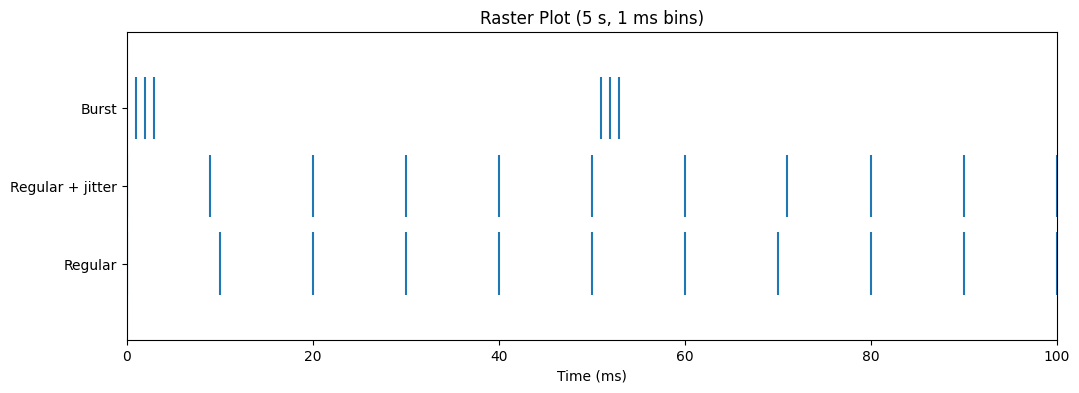

In [ ]:
import matplotlib.pyplot as plt
# round to nearest bin index
Regular_noise_bins = np.rint(Regular_noise).astype(int)
# ---- Raster plot ----
plt.figure(figsize=(12, 4))

plt.eventplot(
    [Regular, Regular_noise_bins, burst_spikes],
    lineoffsets=[1, 2, 3],
    linelengths=0.8
)

plt.xlim(0, 100) #only shows the first 100 bins
plt.xlabel("Time (ms)")
plt.yticks([1, 2, 3], ["Regular", "Regular + jitter", "Burst"])
plt.title("Raster Plot (5 s, 1 ms bins)")
plt.show()

Qustions:

What did you see? Did the results match your expectations?

I see the patterns of how neurons fire and the time they are firing, we could see if this neuron if firing regularly or burstly. It did match my expectations because the firing pattern matches. The neurons with noises has some difference comparing to the regular firing neurons and the burst neurons fires around every 50 ms.

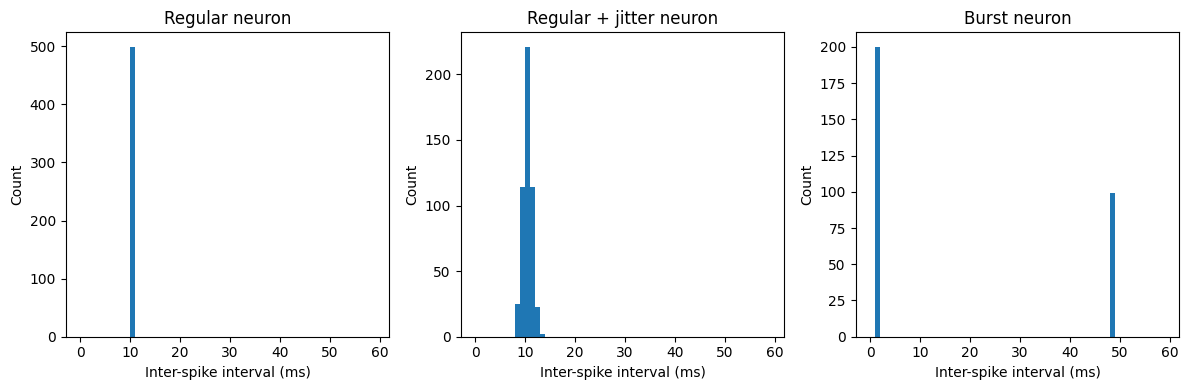

In [ ]:
isi_regular = np.diff(Regular)
isi_regular_noise = np.diff(Regular_noise_bins)
isi_burst = np.diff(burst_spikes)


bins_isi = np.arange(0, 60, 1)  # ISI bins in ms

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(isi_regular, bins=bins_isi)
plt.title("Regular neuron")
plt.xlabel("Inter-spike interval (ms)")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(isi_regular_noise, bins=bins_isi)
plt.title("Regular + jitter neuron")
plt.xlabel("Inter-spike interval (ms)")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(isi_burst, bins=bins_isi)
plt.title("Burst neuron")
plt.xlabel("Inter-spike interval (ms)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Questions:
What does the ISI histogram look like for a perfectly regular neuron?

The ISI only has a bar of histogram for the regular firing neuron, because its difference between firing time is the same.

How does noise affect the ISI distribution?

the noise would affect the ISI from a single histogram bar to a gaussian distribution.

What distinguishes a bursting neuron's ISI histogram from a regular neuron's?

The bursting neurons differs from other neurons by having two bars of inter-spike interval, which the smaller one is the interval between spike when it is bursting and the larger one is the interval between two bursting.

In [ ]:
My_neuron = Regular + np.random.normal(10, 1.5, size=len(Regular))#noise with std=0.3


# Step 1: generate random steps (not spike times yet)
steps = np.random.normal(10, 1, size=500)

# Step 2: make sure steps are positive
steps = np.clip(steps, 0.1, None)

# Step 3: convert to spike times using cumsum
My_neuron = np.cumsum(steps)

# Step 4: keep only spikes within 5000 bins
My_neuron = My_neuron[My_neuron < bins]

# Step 5: round to integer bins
My_neuron = np.rint(My_neuron).astype(int)


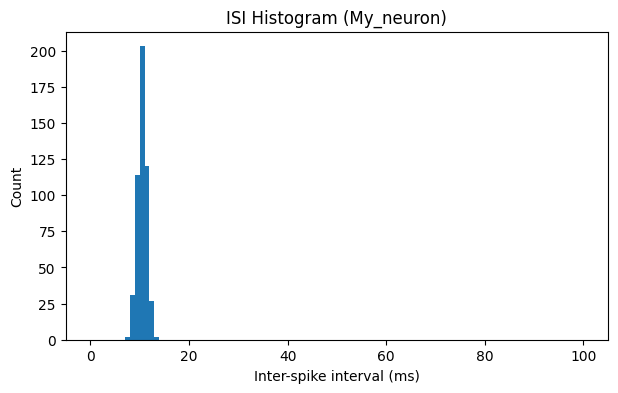

ISI mean: 9.995991983967937
ISI std: 1.0029934994084373
Min/Max ISI: 7 13


In [ ]:
# My_neuron should be a sorted 1D array of spike times in ms bins (0..4999)
# e.g., My_neuron = np.unique(np.rint(My_neuron).astype(int))

# 1) ISI (ms)
isi_my = np.diff(My_neuron)  # consecutive differences

# Optional: remove zeros if you somehow have duplicates (shouldn't if you used unique)
isi_my = isi_my[isi_my > 0]

# 2) Histogram (choose bin size = 1 ms or 0.5 ms)
bin_size = 1.0  # change to 0.5 if you want finer bins
bins_isi = np.arange(0, 100 + bin_size, bin_size)  # 0..100 ms (adjust if needed)

plt.figure(figsize=(7,4))
plt.hist(isi_my, bins=bins_isi)
plt.xlabel("Inter-spike interval (ms)")
plt.ylabel("Count")
plt.title("ISI Histogram (My_neuron)")
plt.show()

print("ISI mean:", np.mean(isi_my))
print("ISI std:", np.std(isi_my))
print("Min/Max ISI:", np.min(isi_my), np.max(isi_my))


? Which neuron type (A, B, or C) does your synthetic neuron most closely resemble?

It resembles to type B, regular firing neurons with noise.

? What features of the ISI histogram led you to this conclusion?
It has a gaussian distribution with a mean of 10, which is similar to B neuron.

? How does changing the standard deviation parameter affect the ISI distribution?

It will affect how much it jitters from the mean, when I increase the standard deviation, the range of the ISI increases and it becomes wider.